#üìå Extracci√≥n

In [1]:
#Se monta el disco de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importando la biblioteca Pandas
import pandas as pd

In [3]:
#Importando el archivo con la data respectiva (En mi caso cargue los archivos en la carpeta Colab Notebooks de mi Google Drive)
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/TelecomX_Data.json'
df = pd.read_json(ruta_archivo)

In [4]:
#Leyendo los primeros 5 registros del archivo recien importado que de ahora en adelante se llamar√° df
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [5]:
#Analizando el tipo de datos existentes en DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
#Se detecta que son 6 columnas de las cuales hay 4 columnas anidadas por lo que con el siguiente codigo se procede a normalizar
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

In [7]:
#Con las Columnas normalizadas se procede a agregar al df original para una lectura completa
df = pd.concat([df, customer, phone, internet, account], axis=1)

df.sample(5)

customerID Churn                                           customer  \
7249  9968-FFVVH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3738  5146-YYFRZ    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
5635  7694-VLBWQ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3477  4815-TUMEQ    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1842  2621-UDNLU    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   

                                                phone  \
7249  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
3738   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
5635  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
3477   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1842   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                               internet  \
7249  {'InternetService': 'DSL', 'OnlineSecurity': '...   
3738  {'InternetService': 'No', 'OnlineSecurity': 'N...   
5635  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3477  {'InternetService': 'No', 'OnlineSecurity': 'N...   
1842  {'InternetService': 'No', 'OnlineSecurity': 'N...   

                                                account  gender  \
7249  {'Contract': 'One year', 'PaperlessBilling': '...    Male   
3738  {'Contract': 'Two year', 'PaperlessBilling': '...    Male   
5635  {'Contract': 'One year', 'PaperlessBilling': '...    Male   
3477  {'Contract': 'One year', 'PaperlessBilling': '...  Female   
1842  {'Contract': 'Month-to-month', 'PaperlessBilli...  Female   

      SeniorCitizen Partner Dependents  ...         OnlineBackup  \
7249              0      No         No  ...                  Yes   
3738              0      No         No  ...  No internet service   
5635              0     Yes         No  ...                  Yes   
3477              0      No         No  ...  No internet service   
1842              0     Yes         No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
7249                  Yes                  Yes                   No   
3738  No internet service  No internet service  No internet service   
5635                  Yes                   No                  Yes   
3477  No internet service  No internet service  No internet service   
1842  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
7249                   No        One year               No   
3738  No internet service        Two year               No   
5635                  Yes        One year               No   
3477  No internet service        One year              Yes   
1842  No internet service  Month-to-month               No   

                  PaymentMethod Charges.Monthly Charges.Total  
7249  Bank transfer (automatic)           68.80       4111.35  
3738  Bank transfer (automatic)           19.95       1311.75  
5635           Electronic check          104.10       7040.85  
3477               Mailed check           19.30         185.2  
1842               Mailed check           20.85            72  

[5 rows x 25 columns]

In [8]:
#Ahora se eliminan las columnas anidadas que se encuentran en el DF luego de extraer la informaci√≥n

datos = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [9]:
#Validacion de los cambios
datos.sample(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
6852  9451-WLYRI    No  Female              0     Yes         No      53   
3573  4923-ADWXJ    No  Female              0      No         No      25   
3316  4625-EWPTF   Yes    Male              0      No         No       8   
4571  6261-LHRTG    No  Female              0      No         No      26   
3570  4919-IKATY   Yes    Male              0     Yes        Yes       5   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
6852          Yes                No              No  ...  No internet service   
3573          Yes                No             DSL  ...                  Yes   
3316           No  No phone service             DSL  ...                   No   
4571          Yes                No             DSL  ...                  Yes   
3570          Yes               Yes     Fiber optic  ...                   No   

         DeviceProtection          TechSupport          StreamingTV  \
6852  No internet service  No internet service  No internet service   
3573                   No                  Yes                   No   
3316                   No                   No                   No   
4571                  Yes                   No                   No   
3570                  Yes                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
6852  No internet service        One year               No   
3573                  Yes  Month-to-month              Yes   
3316                   No  Month-to-month              Yes   
4571                   No  Month-to-month              Yes   
3570                   No  Month-to-month              Yes   

                  PaymentMethod Charges.Monthly  Charges.Total  
6852    Credit card (automatic)           19.05         990.45  
3573  Bank transfer (automatic)           65.80        1679.65  
3316           Electronic check           30.45         226.45  
4571    Credit card (automatic)           54.75         1406.9  
3570           Electronic check           84.50         453.75  

[5 rows x 21 columns]

#üîß Transformaci√≥n

Comprender la estructura del dataset y el significado de sus columnas. Esta etapa servir√° para identificar qu√© variables son m√°s relevantes para el an√°lisis de evasi√≥n de clientes.

*- Explorar las columnas del dataset y verificar sus tipos de datos.

*- Consultar el diccionario para comprender mejor el significado de las variables.

*- Identificar las columnas m√°s relevantes para el an√°lisis de evasi√≥n.

In [10]:
#Se procede a validar la informacion existente en las columnas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
#La columna Charges.Total deber√≠a ser una columna tipo float se procede a explorar la columna
datos['Charges.Total'].value_counts()

Charges.Total
20.2       11
           11
19.75       9
19.55       9
19.9        9
           ..
1993.2      1
72.1        1
1237.85     1
542.4       1
593.3       1
Name: count, Length: 6531, dtype: int64

In [12]:
import numpy as np
datos['Charges.Total'] = datos['Charges.Total'].str.replace(',', '').replace('$', '').replace(' ', '').replace('', None) #Eliminar caracteres innecesarios
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64) #Se convierte a tipo float64
datos['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [13]:
datos['Charges.Total'].isna().value_counts()

Charges.Total
False    7256
True       11
Name: count, dtype: int64

In [14]:
#Valido las Filas vac√≠as
total_nulos = datos['Charges.Total'].isna()
datos[total_nulos]

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05            NaN  
1775               Mailed check           20.00            NaN  
1955  Bank transfer (automatic)           61.90            NaN  
2075               Mailed check           19.70            NaN  
2232               Mailed check           20.25            NaN  
2308               Mailed check           25.35            NaN  
2930               Mailed check           73.35            NaN  
3134               Mailed check           25.75            NaN  
3203  Ban

In [15]:
#Al no ser informaci√≥n relevante se eliminan las filas
datos = datos.drop(datos[total_nulos].index, axis = 0)
datos = datos.reset_index(drop=True)
datos.value_counts().sum()

np.int64(7256)

In [16]:
#Validamos nuevamente
datos['Charges.Total'].isna().value_counts()

Charges.Total
False    7256
Name: count, dtype: int64

In [17]:
datos.sample(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
1900  2690-DVRVK    No    Male              0     Yes        Yes       5   
931   1310-QRITU    No  Female              0      No         No      18   
7154  9848-JQJTX    No    Male              0      No         No      72   
6134  8404-VLQFB    No  Female              0     Yes        Yes      15   
5652  7734-DBOAI   Yes  Female              0     Yes        Yes       1   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
1900          Yes                No              No  ...  No internet service   
931           Yes               Yes             DSL  ...                   No   
7154          Yes               Yes     Fiber optic  ...                  Yes   
6134          Yes               Yes              No  ...  No internet service   
5652           No  No phone service             DSL  ...                   No   

         DeviceProtection          TechSupport          StreamingTV  \
1900  No internet service  No internet service  No internet service   
931                    No                   No                   No   
7154                  Yes                   No                  Yes   
6134  No internet service  No internet service  No internet service   
5652                   No                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
1900  No internet service        One year               No   
931                    No  Month-to-month              Yes   
7154                  Yes        Two year              Yes   
6134  No internet service  Month-to-month              Yes   
5652                   No  Month-to-month               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
1900           Electronic check           20.55          99.45  
931            Electronic check           50.30         913.30  
7154  Bank transfer (automatic)          100.90        7459.05  
6134           Electronic check           25.25         394.85  
5652           Electronic check           40.10          40.10  

[5 rows x 21 columns]

In [18]:
datos.nunique()

customerID          7256
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1584
Charges.Total       6530
dtype: int64

In [19]:
#Se revisar√°n columnas con mas de 2 datos
col_revisar = datos[['Churn','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]

In [20]:
for col in col_revisar:
    print(f"\n--- {col} ---")
    print(datos[col].value_counts())


--- Churn ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3181
Yes                    2500
No internet service    1575
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3194
Yes                    2487
No internet service    1575
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3581
Yes                    2100
No internet service    1575
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No                     2895
Y

In [21]:
# Se definen los diccionarios con la informaci√≥n de cada fila siendo convertidos en binarios

mapeos = {
   #Cuando exista "Yes" -> 1 "No" -> 0
    'Churn': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0}, #
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'gender' : {'Female': 1, 'Male': 0}
        }



# Aplico el mapeos con la herramienta .replace()
datos.replace(mapeos, inplace=True)


# Se Verifica nuevamente

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


/tmp/ipython-input-21-1100138067.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeos, inplace=True)


In [22]:
#Se Analiza la Columna Churn
datos['Churn'].value_counts()

Churn
0    5163
1    1869
      224
Name: count, dtype: int64

In [23]:
#El analisis indica que existen 224 filas vacilas por lo que se proceden a revisar

churn_vacio = datos['Churn'].str.strip() == ''
datos[churn_vacio]

customerID Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
30    0047-ZHDTW             1              0        0           0      11   
75    0120-YZLQA             0              0        0           0      71   
96    0154-QYHJU             0              0        0           0      29   
98    0162-RZGMZ             1              1        0           0       5   
175   0274-VVQOQ             0              1        1           0      65   
...          ...   ...     ...            ...      ...         ...     ...   
7147  9840-GSRFX             1              0        0           0      14   
7169  9872-RZQQB             1              0        1           0      49   
7200  9920-GNDMB             0              0        0           0       9   
7228  9955-RVWSC             1              0        1           1      67   
7236  9966-VYRTZ             1              0        1           1      31   

      PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
30               1              1     Fiber optic  ...             0   
75               1              0              No  ...             0   
96               1              0             DSL  ...             1   
98               1              0             DSL  ...             1   
175              1              1     Fiber optic  ...             1   
...            ...            ...             ...  ...           ...   
7147             1              1             DSL  ...             1   
7169             0              0             DSL  ...             0   
7200             1              1     Fiber optic  ...             0   
7228             1              0              No  ...             0   
7236             1              0              No  ...             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
30                   0            0            0                0   
75                   0            0            0                0   
96                   0            1            0                0   
98                   0            1            0                0   
175                  1            0            1                1   
...                ...          ...          ...              ...   
7147                 0            0            0                0   
7169                 0            0            1                0   
7200                 0            0            0                0   
7228                 0            0            0                0   
7236                 0            0            0                0   

            Contract PaperlessBilling              PaymentMethod  \
30    Month-to-month                1  Bank transfer (automatic)   
75          Two year                1    Credit card (automatic)   
96          One year                1           Electronic check   
98    Month-to-month                0    Credit card (automatic)   
175         One year                1  Bank transfer (automatic)   
...              ...              ...                        ...   
7147        One year                1               Mailed check   
7169  Month-to-month                0  Bank transfer (automatic)   
7200  Month-to-month                1           Electronic check   
7228        Two year                1  Bank transfer (automatic)   
7236  Month-to-month                1               Mailed check   

     Charges.Monthly  Charges.Total  
30             79.00         929.30  
75             19.90        1355.10  
96             58.75        1696.20  
98             59.90         287.85  
175           103.15        6792.45  
...              ...            ...  
7147           54.25         773.20  
7169           40.65        2070.75  
7200           76.25         684.85  
7228           19.25        1372.90  
7236           19.55         658.95  

[224 rows x 21 columns]

In [24]:
print(datos[churn_vacio].nunique())

customerID          224
Churn                 1
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure               64
PhoneService          2
MultipleLines         2
InternetService       3
OnlineSecurity        2
OnlineBackup          2
DeviceProtection      2
TechSupport           2
StreamingTV           2
StreamingMovies       2
Contract              3
PaperlessBilling      2
PaymentMethod         4
Charges.Monthly     188
Charges.Total       223
dtype: int64


In [25]:
datos.loc[churn_vacio, 'Churn'] = 0

In [26]:
#Se cambia el tipo de la columna Churn
datos['Churn'] = datos['Churn'].astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


In [27]:
#Puede ser de utilidad la herramienta get_dummies para asi separar las columnas

#InternetService
datos = pd.get_dummies(datos, columns=['InternetService'], prefix=' ', dummy_na=False)

# Contract
datos = pd.get_dummies(datos, columns=['Contract'], prefix=' ', dummy_na=False)

# PaymentMethod
datos = pd.get_dummies(datos, columns=['PaymentMethod'], prefix=' ', dummy_na=False)

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

In [28]:
#Se convierten las columnas a tipo Entero
for col in datos.columns:
    if datos[col].dtype == bool:
        datos[col] = datos[col].astype(int)

datos.sample(3)

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
3085  4307-KWMXE      0       0              0        0           0      10   
5329  7293-LSCDV      0       1              0        1           1      60   
5185  7094-MSZAO      0       0              0        1           1      10   

      PhoneService  MultipleLines  OnlineSecurity  ...   _DSL   _Fiber optic  \
3085             0              0               0  ...      1              0   
5329             1              0               0  ...      0              0   
5185             1              0               0  ...      0              0   

       _No   _Month-to-month   _One year   _Two year  \
3085     0                 1           0           0   
5329     1                 0           0           1   
5185     1                 1           0           0   

       _Bank transfer (automatic)   _Credit card (automatic)  \
3085                            0                          0   
5329                            0                          1   
5185                            0                          1   

       _Electronic check   _Mailed check  
3085                   1               0  
5329                   0               0  
5185                   0               0  

[3 rows x 28 columns]

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

In [30]:
col_grupo1 = [' _No', ' _DSL', ' _Fiber optic']
col_grupo2 = ['Charges.Monthly', 'Charges.Total']
col_actuales = datos.columns.tolist()

new_order = []

for col in col_actuales:
    if col == 'OnlineSecurity':
        break
    if col not in col_grupo1 + col_grupo2:
         new_order.append(col)

for col_internet in col_grupo1:
    if col_internet in datos.columns:
        new_order.append(col_internet)

if 'OnlineSecurity' in datos.columns:
     new_order.append('OnlineSecurity')

     indice_referencia = col_actuales.index('OnlineSecurity')
     for col in col_actuales[indice_referencia + 1:]:
         if col not in col_grupo1 + col_grupo2:
             new_order.append(col)

for col_precio in col_grupo2:
    if col_precio in datos.columns:
        new_order.append(col_precio)


# Se revisa el orden nuevo creado
print("\nColumnas organizadas:")
print(new_order)



Columnas organizadas:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', ' _No', ' _DSL', ' _Fiber optic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', ' _Month-to-month', ' _One year', ' _Two year', ' _Bank transfer (automatic)', ' _Credit card (automatic)', ' _Electronic check', ' _Mailed check', 'Charges.Monthly', 'Charges.Total']


In [31]:
#Guardamos en una variable para facil acceso
d_reorganizado = datos[new_order].copy()

datos = d_reorganizado

datos.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       1              0        1           1       9   
1  0003-MKNFE      0       0              0        0           0       9   
2  0004-TLHLJ      1       0              0        0           0       4   
3  0011-IGKFF      1       0              1        1           0      13   
4  0013-EXCHZ      1       1              1        1           0       3   

   PhoneService  MultipleLines   _No  ...  PaperlessBilling   _Month-to-month  \
0             1              0     0  ...                 1                 0   
1             1              1     0  ...                 0                 1   
2             1              0     0  ...                 1                 1   
3             1              0     0  ...                 1                 1   
4             1              0     0  ...                 1                 1   

    _One year   _Two year   _Bank transfer (automatic)  \
0           1           0                            0   
1           0           0                            0   
2           0           0                            0   
3           0           0                            0   
4           0           0                            0   

    _Credit card (automatic)   _Electronic check   _Mailed check  \
0                          0                   0               1   
1                          0                   0               1   
2                          0                   1               0   
3                          0                   1               0   
4                          0                   0               1   

   Charges.Monthly  Charges.Total  
0             65.6         593.30  
1             59.9         542.40  
2             73.9         280.85  
3             98.0        1237.85  
4             83.9         267.40  

[5 rows x 28 columns]

In [32]:
#Existen 2 columnas que no son necesarias por lo que procedo a sacarlas
datos = datos.drop(datos[['customerID',' _No']], axis = 1)
datos.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 ' _DSL',
 ' _Fiber optic',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 ' _Month-to-month',
 ' _One year',
 ' _Two year',
 ' _Bank transfer (automatic)',
 ' _Credit card (automatic)',
 ' _Electronic check',
 ' _Mailed check',
 'Charges.Monthly',
 'Charges.Total']

In [33]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        7256 non-null   int64  
 1   gender                       7256 non-null   int64  
 2   SeniorCitizen                7256 non-null   int64  
 3   Partner                      7256 non-null   int64  
 4   Dependents                   7256 non-null   int64  
 5   tenure                       7256 non-null   int64  
 6   PhoneService                 7256 non-null   int64  
 7   MultipleLines                7256 non-null   int64  
 8    _DSL                        7256 non-null   int64  
 9    _Fiber optic                7256 non-null   int64  
 10  OnlineSecurity               7256 non-null   int64  
 11  OnlineBackup                 7256 non-null   int64  
 12  DeviceProtection             7256 non-null   int64  
 13  TechSupport       

In [34]:
#Para una f√°cil lectura se traducen los encabezados de las columnas

nombres_nuevos = {
    'Churn': 'Cancelaci√≥n',
    'gender': 'G√©nero',
    'SeniorCitizen': 'Jubilado',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Tel√©fono_Servicio',
    'MultipleLines': 'M√∫ltiples_Lineas',
    ' _Fiber optic' : 'Fibra_Optica',
    ' _DSL': 'DSL',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Backup_En_Linea',
    'DeviceProtection': 'Protecci√≥n_Dispositivo',
    'TechSupport': 'Soporte_T√©cnico',
    'StreamingTV': 'Transmisi√≥n_TV',
    'StreamingMovies': 'Transmisi√≥n_Peliculas',
    ' _Month-to-month': 'Contrato_Mensual',
    ' _One year': 'Contrato_Anual',
    ' _Two year': 'Contrato_Bianual',
    'PaperlessBilling': 'Facturaci√≥n_Electr√≥nica',
    'Charges.Monthly': 'Cuentas_Mensuales',
    'Charges.Total': 'Cuentas_Totales',
    ' _Bank transfer (automatic)': 'Pago_Transf_Banco',
    ' _Credit card (automatic)': 'Pago_T.Cr√©dito_Auto',
    ' _Electronic check': 'Pago_Cheque_Electr√≥nico',
    ' _Mailed check': 'Pago_Cheque_Correo',
}
datos.rename(columns=nombres_nuevos, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cancelaci√≥n              7256 non-null   int64  
 1   G√©nero                   7256 non-null   int64  
 2   Jubilado                 7256 non-null   int64  
 3   Pareja                   7256 non-null   int64  
 4   Dependientes             7256 non-null   int64  
 5   Meses_Contrato           7256 non-null   int64  
 6   Tel√©fono_Servicio        7256 non-null   int64  
 7   M√∫ltiples_Lineas         7256 non-null   int64  
 8   DSL                      7256 non-null   int64  
 9   Fibra_Optica             7256 non-null   int64  
 10  Seguridad_En_Linea       7256 non-null   int64  
 11  Backup_En_Linea          7256 non-null   int64  
 12  Protecci√≥n_Dispositivo   7256 non-null   int64  
 13  Soporte_T√©cnico          7256 non-null   int64  
 14  Transmisi√≥n_TV   

In [35]:
#Ahora crear√© la coolumna de Cuentas_diarias
dias_mes = 30
datos['Cuentas_Diarias'] = datos['Cuentas_Mensuales'] / dias_mes
datos.sample(3)

Cancelaci√≥n  G√©nero  Jubilado  Pareja  Dependientes  Meses_Contrato  \
4772            0       1         0       1             1              14   
440             0       0         0       0             0              65   
1319            0       1         0       0             0               1   

      Tel√©fono_Servicio  M√∫ltiples_Lineas  DSL  Fibra_Optica  ...  \
4772                  1                 0    0             1  ...   
440                   1                 1    0             1  ...   
1319                  1                 0    0             0  ...   

      Contrato_Mensual  Contrato_Anual  Contrato_Bianual  Pago_Transf_Banco  \
4772                 1               0                 0                  1   
440                  0               1                 0                  0   
1319                 1               0                 0                  0   

      Pago_T.Cr√©dito_Auto  Pago_Cheque_Electr√≥nico  Pago_Cheque_Correo  \
4772                    0                        0                   0   
440                     0                        1                   0   
1319                    0                        0                   1   

      Cuentas_Mensuales  Cuentas_Totales  Cuentas_Diarias  
4772              80.90          1152.80         2.696667  
440               93.55          6069.25         3.118333  
1319              19.50            19.50         0.650000  

[3 rows x 27 columns]

#üìä Carga y an√°lisis

In [38]:
#Se Agrupan los datos Cancelaci√≥n
cancelaron = datos['Cancelaci√≥n'] == 1

no_cancelaron = datos['Cancelaci√≥n'] == 0

In [40]:
datos[cancelaron].describe()

Cancelaci√≥n       G√©nero     Jubilado       Pareja  Dependientes  \
count       1869.0  1869.000000  1869.000000  1869.000000   1869.000000   
mean           1.0     0.502408     0.254682     0.357945      0.174425   
std            0.0     0.500128     0.435799     0.479524      0.379576   
min            1.0     0.000000     0.000000     0.000000      0.000000   
25%            1.0     0.000000     0.000000     0.000000      0.000000   
50%            1.0     1.000000     0.000000     0.000000      0.000000   
75%            1.0     1.000000     1.000000     1.000000      0.000000   
max            1.0     1.000000     1.000000     1.000000      1.000000   

       Meses_Contrato  Tel√©fono_Servicio  M√∫ltiples_Lineas          DSL  \
count     1869.000000        1869.000000       1869.000000  1869.000000   
mean        17.979133           0.909042          0.454789     0.245586   
std         19.531123           0.287626          0.498085     0.430549   
min          1.000000           0.000000          0.000000     0.000000   
25%          2.000000           1.000000          0.000000     0.000000   
50%         10.000000           1.000000          0.000000     0.000000   
75%         29.000000           1.000000          1.000000     0.000000   
max         72.000000           1.000000          1.000000     1.000000   

       Fibra_Optica  ...  Contrato_Mensual  Contrato_Anual  Contrato_Bianual  \
count   1869.000000  ...       1869.000000     1869.000000       1869.000000   
mean       0.693954  ...          0.885500        0.088818          0.025682   
std        0.460972  ...          0.318502        0.284556          0.158228   
min        0.000000  ...          0.000000        0.000000          0.000000   
25%        0.000000  ...          1.000000        0.000000          0.000000   
50%        1.000000  ...          1.000000        0.000000          0.000000   
75%        1.000000  ...          1.000000        0.000000          0.000000   
max        1.000000  ...          1.000000        1.000000          1.000000   

       Pago_Transf_Banco  Pago_T.Cr√©dito_Auto  Pago_Cheque_Electr√≥nico  \
count        1869.000000          1869.000000              1869.000000   
mean            0.138042             0.124131                 0.573034   
std             0.345036             0.329819                 0.494770   
min             0.000000             0.000000                 0.000000   
25%             0.000000             0.000000                 0.000000   
50%             0.000000             0.000000                 1.000000   
75%             0.000000             0.000000                 1.000000   
max             1.000000             1.000000                 1.000000   

       Pago_Cheque_Correo  Cuentas_Mensuales  Cuentas_Totales  Cuentas_Diarias  
count         1869.000000        1869.000000      1869.000000      1869.000000  
mean             0.164794          74.441332      1531.796094         2.481378  
std              0.371094          24.666053      1890.822994         0.822202  
min              0.000000          18.850000        18.850000         0.628333  
25%              0.000000          56.150000       134.500000         1.871667  
50%              0.000000          79.650000       703.550000         2.655000  
75%              0.000000          94.200000      2331.300000         3.140000  
max              1.000000         118.350000      8684.800000         3.945000  

[8 rows x 27 columns]

In [39]:
datos[no_cancelaron].describe()

Cancelaci√≥n       G√©nero     Jubilado       Pareja  Dependientes  \
count       5387.0  5387.000000  5387.000000  5387.000000   5387.000000   
mean           0.0     0.491554     0.131056     0.527195      0.342306   
std            0.0     0.499975     0.337493     0.499306      0.474525   
min            0.0     0.000000     0.000000     0.000000      0.000000   
25%            0.0     0.000000     0.000000     0.000000      0.000000   
50%            0.0     0.000000     0.000000     1.000000      0.000000   
75%            0.0     1.000000     0.000000     1.000000      1.000000   
max            0.0     1.000000     1.000000     1.000000      1.000000   

       Meses_Contrato  Tel√©fono_Servicio  M√∫ltiples_Lineas          DSL  \
count     5387.000000        5387.000000       5387.000000  5387.000000   
mean        37.397253           0.900687          0.410433     0.375719   
std         24.144085           0.299110          0.491958     0.484353   
min          1.000000           0.000000          0.000000     0.000000   
25%         14.000000           1.000000          0.000000     0.000000   
50%         37.000000           1.000000          0.000000     0.000000   
75%         61.000000           1.000000          1.000000     1.000000   
max         72.000000           1.000000          1.000000     1.000000   

       Fibra_Optica  ...  Contrato_Mensual  Contrato_Anual  Contrato_Bianual  \
count   5387.000000  ...       5387.000000     5387.000000       5387.000000   
mean       0.352887  ...          0.436235        0.250975          0.312790   
std        0.477912  ...          0.495963        0.433614          0.463673   
min        0.000000  ...          0.000000        0.000000          0.000000   
25%        0.000000  ...          0.000000        0.000000          0.000000   
50%        0.000000  ...          0.000000        0.000000          0.000000   
75%        1.000000  ...          1.000000        1.000000          1.000000   
max        1.000000  ...          1.000000        1.000000          1.000000   

       Pago_Transf_Banco  Pago_T.Cr√©dito_Auto  Pago_Cheque_Electr√≥nico  \
count        5387.000000          5387.000000              5387.000000   
mean            0.246705             0.247819                 0.255058   
std             0.431134             0.431786                 0.435935   
min             0.000000             0.000000                 0.000000   
25%             0.000000             0.000000                 0.000000   
50%             0.000000             0.000000                 0.000000   
75%             0.000000             0.000000                 1.000000   
max             1.000000             1.000000                 1.000000   

       Pago_Cheque_Correo  Cuentas_Mensuales  Cuentas_Totales  Cuentas_Diarias  
count         5387.000000        5387.000000      5387.000000      5387.000000  
mean             0.250418          61.394932      2540.440867         2.046498  
std              0.433294          31.106744      2330.360507         1.036891  
min              0.000000          18.250000        18.800000         0.608333  
25%              0.000000          25.100000       568.000000         0.836667  
50%              0.000000          64.550000      1669.400000         2.151667  
75%              1.000000          88.700000      4247.825000         2.956667  
max              1.000000         118.750000      8672.450000         3.958333  

[8 rows x 27 columns]

In [41]:
#Se procede a graficar lo anterior, para ello primero importando la libreria para los graficos.
import matplotlib.pyplot as plt
import seaborn as sns

##Comparativa entre los clientes que cancelaron y los que no cancelaron

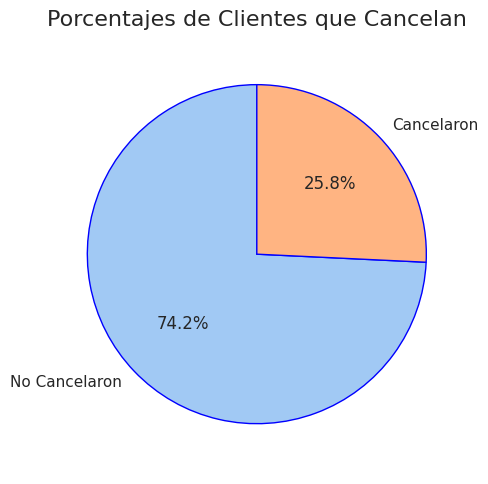

In [43]:
sns.set_theme(style="whitegrid")

# Datos para el pie chart
valores = datos['Cancelaci√≥n'].value_counts()
etiquetas = ['No Cancelaron', 'Cancelaron']
colores = sns.color_palette("pastel")[:3]  # Colores suaves

# Gr√°fico circular
plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'edgecolor': 'blue'})
plt.title('Porcentajes de Clientes que Cancelan', fontsize=16)
plt.axis('equal')
plt.tight_layout()

plt.savefig("Porcentajes_Cancelacion.png", dpi=300, bbox_inches='tight')

plt.show()

##Comparaci√≥n de cancelaci√≥n vs tiempo y gasto mensual y diario

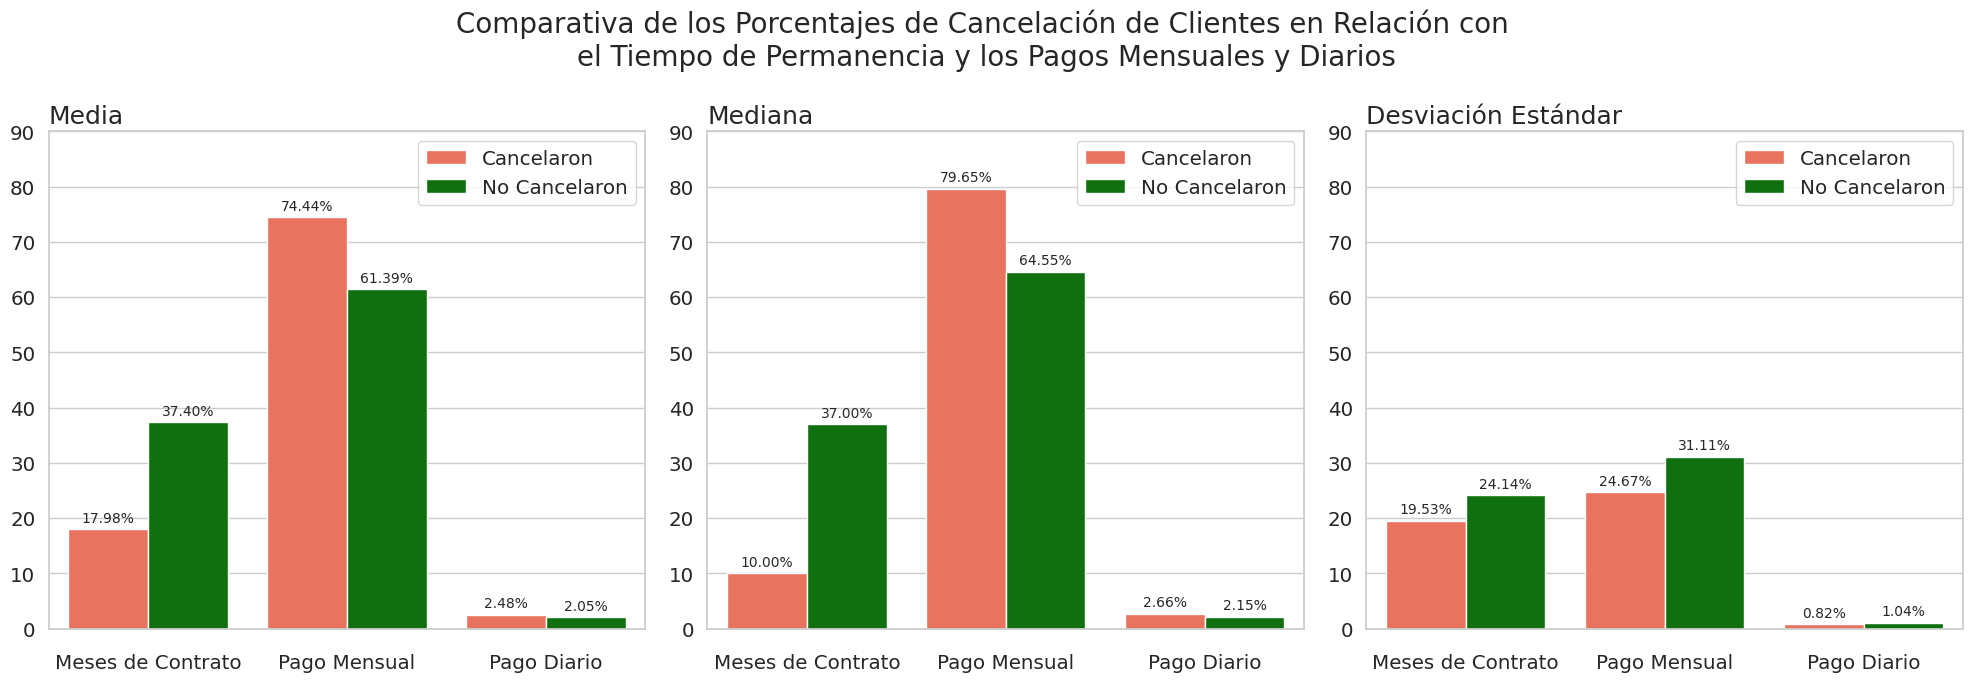

In [45]:
#Ahora voy a graficar los valores de media, mediana y Desviaci√≥n est√°ndar

sns.set_theme(style="whitegrid")  # Cl√°sico limpio con l√≠neas
sns.set_theme(style="whitegrid", font_scale=1.1)
colores = sns.color_palette("pastel")[:3]
sns.set_context("notebook", font_scale=1.3)

# Columnas a comparar
cols = ['Meses_Contrato', 'Cuentas_Mensuales', 'Cuentas_Diarias']

nombres_personalizados = {
    'Meses_Contrato': 'Meses de Contrato',
    'Cuentas_Mensuales': 'Pago Mensual',
    'Cuentas_Diarias': 'Pago Diario'
}

# Funci√≥n para calcular estad√≠sticas por grupo
def resumen_estadisticas(datos, columnas):
    lista = []
    for col in columnas:
        cancelaron = datos[datos['Cancelaci√≥n'] == 1][col]
        no_cancelaron = datos[datos['Cancelaci√≥n'] == 0][col]

        lista.append(['Media', col, 'Cancelaron', cancelaron.mean()])
        lista.append(['Media', col, 'No Cancelaron', no_cancelaron.mean()])
        lista.append(['Mediana', col, 'Cancelaron', cancelaron.median()])
        lista.append(['Mediana', col, 'No Cancelaron', no_cancelaron.median()])
        lista.append(['Desviaci√≥n Est√°ndar', col, 'Cancelaron', cancelaron.std()])
        lista.append(['Desviaci√≥n Est√°ndar', col, 'No Cancelaron', no_cancelaron.std()])

    df = pd.DataFrame(lista, columns=['Estadistica', 'Variable', 'Grupo', 'Valor'])
    return df

# Calculo el resumen
df_resumen = resumen_estadisticas(datos, cols)

# Crear gr√°fico con subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

# Gr√°ficos por estad√≠stica
estadisticas = ['Media', 'Mediana', 'Desviaci√≥n Est√°ndar']
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'green'}

for i, estadistica in enumerate(estadisticas):
    df_plot = df_resumen[df_resumen['Estadistica'] == estadistica].copy()
    df_plot['Variable'] = df_plot['Variable'].map(nombres_personalizados)

    sns.barplot(data=df_plot, x='Variable', y='Valor', hue='Grupo',
                palette=colores, ax=axes[i])

    axes[i].set_title(estadistica, fontsize = 18, loc ='left')


    # Ajusto el eje Y seg√∫n el tipo de estad√≠stica
    if estadistica == 'Media':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Mediana':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Desviaci√≥n Est√°ndar':
        axes[i].set_ylim(0, 90)

    axes[i].set_ylabel('',)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x',size = 14)
    axes[i].legend(title = '',loc='upper right')

    # Mostrar los valores encima de las barras
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize = 10)

# T√≠tulo general y ajuste del espacio superior
plt.suptitle('Comparativa de los Porcentajes de Cancelaci√≥n de Clientes en Relaci√≥n con \nel Tiempo de Permanencia y los Pagos Mensuales y Diarios', fontsize=20)
plt.subplots_adjust(top=1)
plt.tight_layout()

plt.savefig("Comparacion_PagoXMes-Dia-y-Tiempo.png", dpi=300, bbox_inches='tight')


plt.show()

Con esta Gr√°fica se deduce que:

*- Los clientes que Cancelaron, ten√≠an un porcentaje de cobro mensual y diario, m√°s elevado que el de los clientes NO cancelaron.


## Comparacion de Cancelaci√≥n por Tipo de Servicios

In [46]:
#Procedo a crear la lista de los servicios a comparar
servicios = ['Tel√©fono_Servicio ', 'M√∫ltiples_Lineas', 'DSL', 'Fibra_optica']

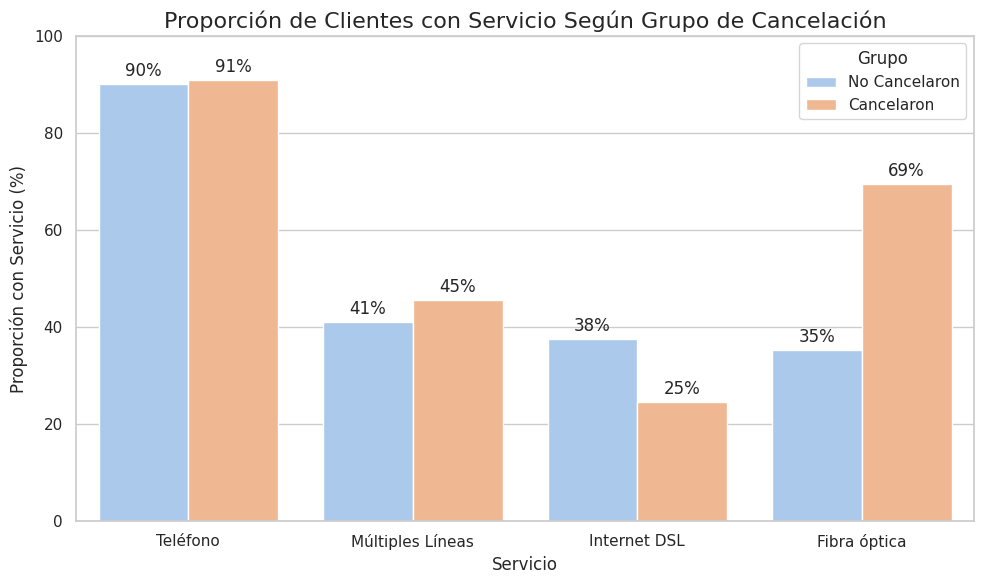

In [48]:
sns.set_theme(style="whitegrid")

# Servicios a analizar
servicios = ['Tel√©fono_Servicio', 'M√∫ltiples_Lineas', 'DSL', 'Fibra_Optica']

nombres_barras = {
    'Tel√©fono_Servicio': 'Tel√©fono',
    'M√∫ltiples_Lineas': 'M√∫ltiples L√≠neas',
    'DSL': 'Internet DSL',
    'Fibra_Optica': 'Fibra √≥ptica'
}

# Preparar DataFrame con proporciones por grupo
df_resultados = []

for servicio in servicios:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelaci√≥n'] == grupo]
        total = len(subset)
        con_servicio = subset[servicio].sum()
        proporci√≥n = (con_servicio / total) * 100 if total > 0 else 0  # ‚Üí en porcentaje

        df_resultados.append([
            nombres_barras[servicio],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporci√≥n
        ])

df_servicios = pd.DataFrame(df_resultados, columns=['Servicio', 'Grupo', 'Proporci√≥n'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_servicios,
    x='Servicio',
    y='Proporci√≥n',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporci√≥n de Clientes con Servicio Seg√∫n Grupo de Cancelaci√≥n', fontsize=16)
plt.xlabel('Servicio')
plt.ylabel('Proporci√≥n con Servicio (%)')
plt.ylim(0, 100)

# Etiquetas de porcentaje sobre cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Es Notable que:

*- En la grafica Tel√©fono existe una ligera diferencia entre los servicios cancelados y los que no cancelaron.

*- Con respecto a las l√≠neas m√∫ltiples hay una ligera relaci√≥n de cancelaci√≥n por parte de los clientes.

*- La proporci√≥n de clientes que Cancelaron el servicio es mayor con respecto al internet de Fibra √≥ptica.

*- Por otro lado al Servicio de DSL cuyo porcentaje es ligeramente mayor en los clientes que se quedaron.

In [62]:
#Servicios Adicionales de Internet
servicios_adicionales = ['Seguridad_En_Linea', 'Backup_En_Linea', 'Protecci√≥n_Dispositivo', 'Soporte_T√©cnico', 'Transmisi√≥n_TV', 'Transmisi√≥n_Peliculas']

nombres_adicionales = {
    'Seguridad_En_Linea': 'Seguridad En Linea',
    'Backup_En_Linea': 'Backup En Linea',
    'Protecci√≥n_Dispositivo': 'Protecci√≥n Dispositivo',
    'Soporte_T√©cnico': 'Soporte t√©cnico',
    'Transmisi√≥n_TV': 'Transmisi√≥n TV',
    'Transmisi√≥n_Peliculas': 'Transmisi√≥n Peliculas'
       }
servicios = ['Tel√©fono_Servicio', 'M√∫ltiples_Lineas', 'DSL', 'Fibra_Optica']

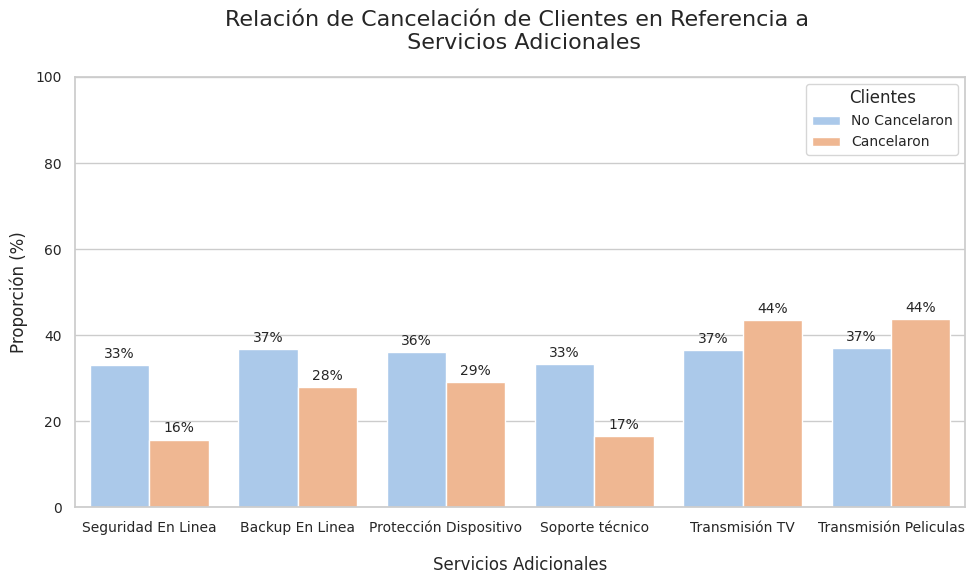

In [67]:
# DataFrame por grupo
df_adicionales = []

for adicional in servicios_adicionales:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelaci√≥n'] == grupo]
        total = len(subset)
        con_el_servicio = subset[adicional].sum()
        proporcion = (con_el_servicio / total) * 100 if total > 0 else 0  # ‚Üí en porcentaje

        df_adicionales.append([
            nombres_adicionales[adicional],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_serv_adicionales = pd.DataFrame(df_adicionales, columns=['Adicional', 'Grupo', 'Proporci√≥n'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_serv_adicionales,
    x='Adicional',
    y='Proporci√≥n',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Relaci√≥n de Cancelaci√≥n de Clientes en Referencia a \n Servicios Adicionales', fontsize=16, pad = 20)
plt.xlabel('Servicios Adicionales', labelpad = 15)
plt.ylabel('Proporci√≥n (%)', labelpad = 5)
plt.ylim(0, 100)
plt.legend(title='Clientes', fontsize = 10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Etiquetas de porcentaje sobre cada barra
for cont in plt.gca().containers:
    container = cont # Asignar a una variable temporal
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.tight_layout()
plt.show()

Este an√°lisis sugiere que ofrecer y promover servicios de seguridad y soporte podr√≠a ser una estrategia para retener clientes, mientras que se deber√≠a investigar m√°s a fondo la relaci√≥n con los servicios de transmisi√≥n.

##Comparativa de cancelaci√≥n por tipo de pago

In [73]:
#Lista con los campos a comparar
forma_pago = ['Pago_Transf_Banco', 'Pago_T.Cr√©dito_Auto', 'Pago_Cheque_Electr√≥nico', 'Pago_Cheque_Correo']

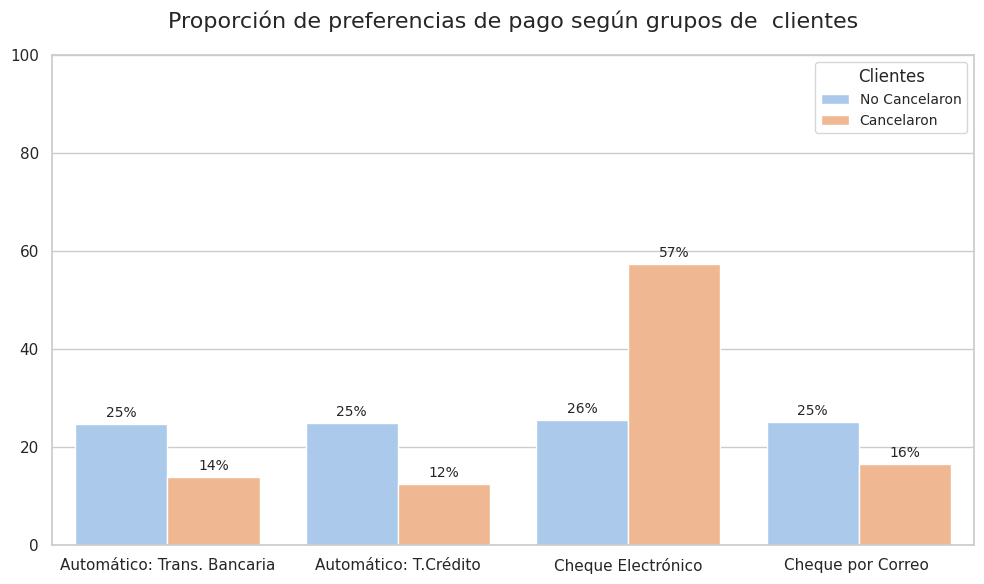

In [74]:
sns.set_theme(style="whitegrid")

#nombres para las barras
nombres_metodos = {
    'Pago_Transf_Banco': 'Autom√°tico: Trans. Bancaria',
    'Pago_T.Cr√©dito_Auto': 'Autom√°tico: T.Cr√©dito',
    'Pago_Cheque_Electr√≥nico': 'Cheque Electr√≥nico',
    'Pago_Cheque_Correo': 'Cheque por Correo '
}

# Preparar DataFrame con proporciones por grupo
df_pagos = []

for metodo in forma_pago:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelaci√≥n'] == grupo]
        total = len(subset)
        preferencia_pago = subset[metodo].sum()
        proporcion = (preferencia_pago / total) * 100 if total > 0 else 0  # ‚Üí en porcentaje

        df_pagos.append([
            nombres_metodos[metodo],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_forma_pago = pd.DataFrame(df_pagos, columns=['Metodo', 'Grupo', 'Proporcion'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_forma_pago,
    x='Metodo',
    y='Proporcion',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporci√≥n de preferencias de pago seg√∫n grupos de  clientes', fontsize=16, pad = 20)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Clientes', fontsize = 10)

plt.ylim(0, 100)

# Etiquetas de porcentaje sobre cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.savefig("grafico_metodos de pago.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Sin duda las personas con pagos automaticos tienen una permanencia constante.

##Comparativa por Tipo de Contrato

In [76]:
#Se agrupa los tipos de contrato
Contratos = ['Contrato_Mensual', 'Contrato_Anual', 'Contrato_Bianual']

#Diccionario con Nombres de las Etiquetas
Nombres_Contratos = {
    'Contrato_Mensual': 'Contrato mes a mes',
    'Contrato_Anual': 'Contrato a 1 a√±o',
    'Contrato_Bianual': 'Contrato a 2 a√±os',
}

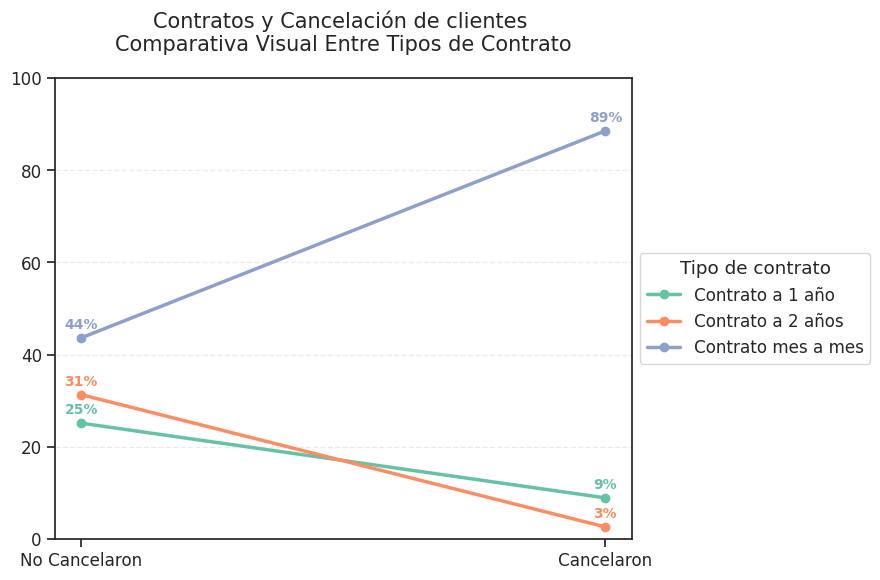

In [77]:
# har√© una gr√°fica tipo slope

sns.set_theme(style="ticks", font_scale=1.1)


datos_slope = []
for contrato in Contratos:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelaci√≥n'] == grupo]
        total = len(subset)
        con_contrato = subset[contrato].sum()
        proporcion = (con_contrato / total) * 100 if total > 0 else 0

        datos_slope.append([
            Nombres_Contratos[contrato],
            'No Cancelaron' if grupo == 0 else 'Cancelaron',
            proporcion
        ])

df_slope = pd.DataFrame(datos_slope, columns=['Contrato', 'Grupo', 'Proporci√≥n'])
pivot = df_slope.pivot(index='Contrato', columns='Grupo', values='Proporci√≥n')

# Grafico
plt.figure(figsize=(9, 6))
colores = sns.color_palette("Set2", n_colors=len(pivot))

for (contrato, fila), color in zip(pivot.iterrows(), colores):
    plt.plot(['No Cancelaron', 'Cancelaron'],
             [fila['No Cancelaron'], fila['Cancelaron']],
             marker='o', linewidth=2.5, color=color, label=contrato)

    # Etiquetas en los puntos
    plt.text('No Cancelaron', fila['No Cancelaron'] + 2, f"{fila['No Cancelaron']:.0f}%",
             ha='center', fontsize=10, weight='bold', color=color)
    plt.text('Cancelaron', fila['Cancelaron'] + 2, f"{fila['Cancelaron']:.0f}%",
             ha='center', fontsize=10, weight='bold', color=color)

# Est√©tica del gr√°fico
plt.title('Contratos y Cancelaci√≥n de clientes \nComparativa Visual Entre Tipos de Contrato',
          fontsize=15, loc='center', pad=20)
plt.ylabel('')
plt.ylim(0, 100)
plt.xticks(['No Cancelaron', 'Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Tipo de contrato', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.savefig("grafico_tipo_contrato.png", dpi=300, bbox_inches='tight')

plt.show()

Contratos de 1 a 2 a√±os, poseen mayor retenci√≥n de clientes

##Cancelaci√≥n por tipo de clientes

In [83]:
clientes = ['G√©nero','Jubilado','Dependientes']

# Defino los valores
tipos_clientes = {
      'G√©nero': {0: 'Hombre', 1: 'Mujer'},
      'Jubilado': {0: 'No', 1: 'SI'},
    'Dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'}
}

In [84]:
# Agrupo los conteos
datos_clientes = []

for var in clientes:
    nombre_legible = var

    for estado in [0, 1]:
        for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
            subset = datos[(datos[var] == estado) & (datos['Cancelaci√≥n'] == grupo)]
            total = len(subset)
            datos_clientes.append([

                f"{var}: {tipos_clientes[var][estado]}",
                'Cancelaron' if grupo == 1 else 'No Cancelaron',
                total
            ])

df_clientes = pd.DataFrame(datos_clientes, columns=['Grupo', 'Estado', 'Cantidad'])


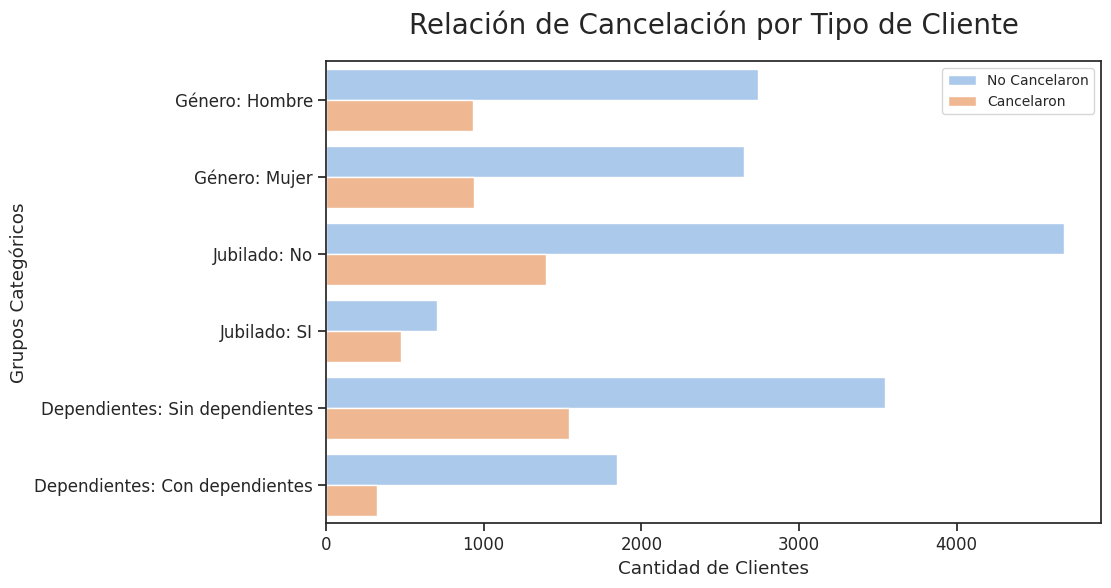

In [85]:
# Se procede a Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clientes, y='Grupo', x='Cantidad', hue='Estado', palette='pastel')

plt.title('Relaci√≥n de Cancelaci√≥n por Tipo de Cliente', fontsize=20, pad=20)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Grupos Categ√≥ricos')
plt.xticks(fontsize=12)
plt.legend(fontsize=10)
plt.show()

Se determina que la mayor cantidad de clientes estan en el grupo de clientes que no est√°n jubiladas a continuaci√≥n el detalle

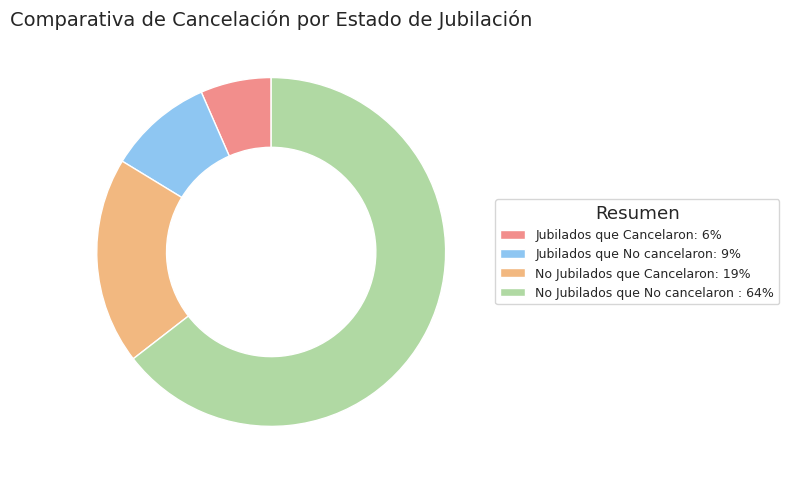

In [89]:
# Defino etiquetas y colores
etiquetas = [
    'Jubilados que Cancelaron',
    'Jubilados que No cancelaron',
    'No Jubilados que Cancelaron',
    'No Jubilados que No cancelaron '
]

valores = [
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelaci√≥n'] == 1)]),
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelaci√≥n'] == 0)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelaci√≥n'] == 1)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelaci√≥n'] == 0)])
]

# Calcular porcentajes
porcentajes = [v / sum(valores) * 100 for v in valores]
etiquetas_con_porcentaje = [
    f'{label}: {int(p)}%' for label, p in zip(etiquetas, porcentajes)
]

colores = ['#F28E8C', '#8EC6F2', '#F2B880', '#B0D9A3']

# Gr√°fica
fig, ax = plt.subplots(figsize=(7, 5))

# Gr√°fico sin etiquetas flotantes
wedges, _ = ax.pie(
    valores,
    startangle=90,
    colors=colores,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

# Leyenda con porcentaje
ax.legend(wedges, etiquetas_con_porcentaje,
          title="Resumen", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title('Comparativa de Cancelaci√≥n por Estado de Jubilaci√≥n', fontsize=14)
plt.tight_layout()

plt.savefig("clientes_jubilados.png", dpi=300, bbox_inches='tight')

plt.show()

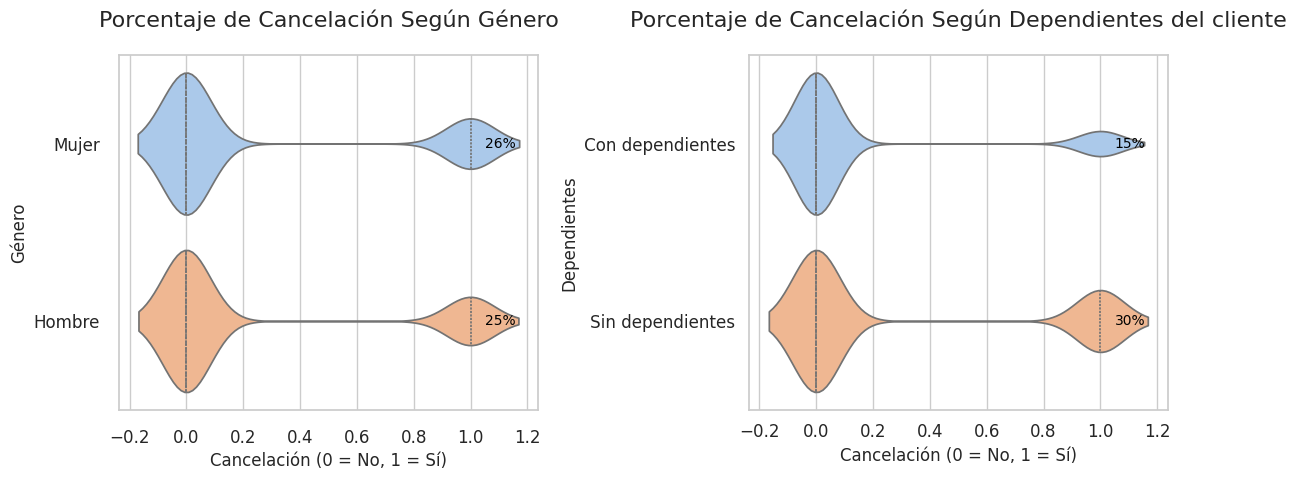

In [90]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Etiquetas legibles
datos['G√©nero_txt'] = datos['G√©nero'].map({0: 'Hombre', 1: 'Mujer'})
datos['Dependientes_txt'] = datos['Dependientes'].map({0: 'Sin dependientes', 1: 'Con dependientes'})

# subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Gr√°fico 1: G√©nero
sns.violinplot(
    data=datos,
    x='Cancelaci√≥n',
    y='G√©nero_txt',
    hue='G√©nero_txt',
    palette='pastel',
    inner='quartile',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Porcentaje de Cancelaci√≥n Seg√∫n G√©nero', fontsize = 16, pad = 20)
axes[0].set_xlabel('Cancelaci√≥n (0 = No, 1 = S√≠)', fontsize = 12)
axes[0].set_ylabel('G√©nero', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)



# A√±adir porcentajes en el gr√°fico
for i, genero in enumerate(['Mujer', 'Hombre']):
    total = len(datos[datos['G√©nero_txt'] == genero])
    cancelados = datos[(datos['G√©nero_txt'] == genero) & (datos['Cancelaci√≥n'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[0].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


# Gr√°fico 2: Dependientes
sns.violinplot(
    data=datos,
    x='Cancelaci√≥n',
    y='Dependientes_txt',
    hue='Dependientes_txt',
    palette='pastel',
    inner='quartile',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Porcentaje de Cancelaci√≥n Seg√∫n Dependientes del cliente', fontsize = 16, pad = 20 )
axes[1].set_xlabel('Cancelaci√≥n (0 = No, 1 = S√≠)', fontsize = 12)
axes[1].set_ylabel('Dependientes', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)


# A√±adir porcentajes manuales
for i, dep in enumerate(['Con dependientes', 'Sin dependientes']):
    total = len(datos[datos['Dependientes_txt'] == dep])
    cancelados = datos[(datos['Dependientes_txt'] == dep) & (datos['Cancelaci√≥n'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[1].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


plt.tight_layout()

plt.savefig("genero_y_dependencia.png", dpi=300, bbox_inches='tight')

plt.show()


##Cancelaci√≥n de Clientes por Tiempo de Contrato y Gasto Total

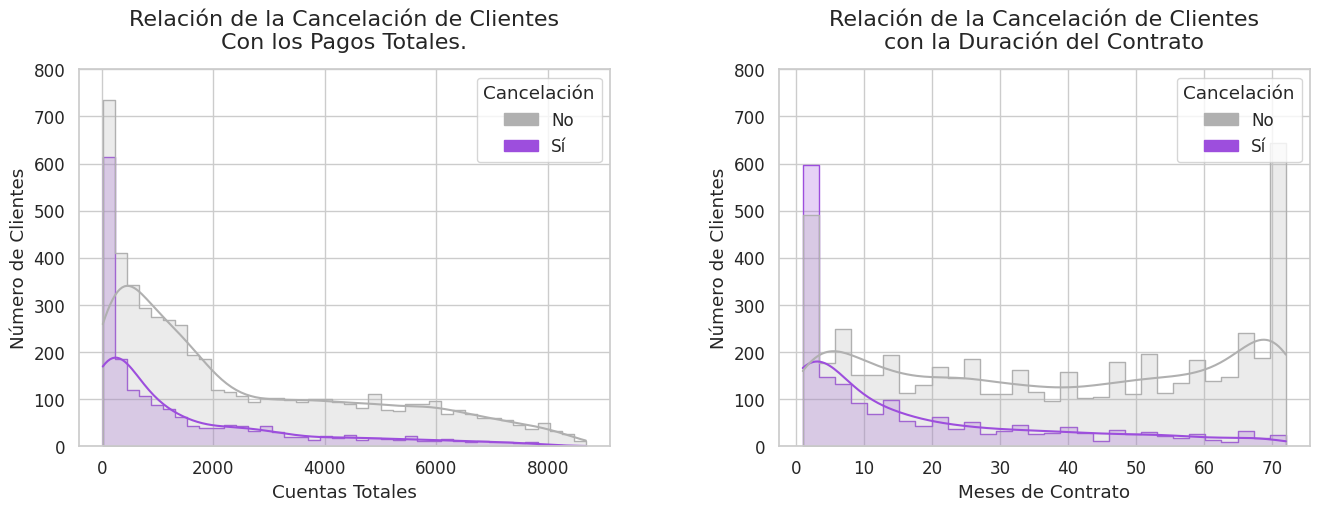

In [93]:
from matplotlib.patches import Patch

sns.set_theme(style="whitegrid", font_scale=1.1)

datos['Cancelaci√≥n_txt'] = datos['Cancelaci√≥n'].map({0: 'No', 1: 'S√≠'})

custom_palette = {'No': '#B0B0B0', 'S√≠': '#9D4EDD'}

ig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout={'w_pad': 0.5})

# Gr√°fico 1 -> Gasto total.
sns.histplot(
    data=datos,
    x='Cuentas_Totales',
    hue='Cancelaci√≥n_txt',
    hue_order=['No', 'S√≠'],
    palette=custom_palette,
    bins=40,
    kde=True,
    ax=axes[0],
    element='step'
)

axes[0].set_title('Relaci√≥n de la Cancelaci√≥n de Clientes\nCon los Pagos Totales.',fontsize = 16, pad = 15)
axes[0].set_xlabel('Cuentas Totales')
axes[0].set_ylabel('N√∫mero de Clientes')
legend_elements = [
    Patch(facecolor='#B0B0B0', edgecolor='#B0B0B0', label='No'),
    Patch(facecolor='#9D4EDD', edgecolor='#9D4EDD', label='S√≠')
    ]
axes[0].legend(handles=legend_elements, title='Cancelaci√≥n')
axes[0].set_ylim(0, 800)

# Gr√°fico 1 -> Meses contratados
sns.histplot(
    data=datos,
    x='Meses_Contrato',
    hue='Cancelaci√≥n_txt',
    hue_order=['No', 'S√≠'],
    palette=custom_palette,
    bins=30,
    kde=True,
    ax=axes[1],
    element='step'
)

axes[1].set_title('Relaci√≥n de la Cancelaci√≥n de Clientes\ncon la Duraci√≥n del Contrato', fontsize = 16, pad = 15)
axes[1].set_xlabel('Meses de Contrato')
axes[1].set_ylabel('N√∫mero de Clientes')
axes[1].legend(handles=legend_elements, title='Cancelaci√≥n', loc = 'upper right')
axes[1].set_ylim(0, 800)

plt.savefig("grafico_cuentas_tiempo.png", dpi=300, bbox_inches='tight')


# Mostrar gr√°fico
plt.show()

##Correlaci√≥n de cancelaci√≥n con diferentes variables

In [94]:
datos.columns.tolist()

['Cancelaci√≥n',
 'G√©nero',
 'Jubilado',
 'Pareja',
 'Dependientes',
 'Meses_Contrato',
 'Tel√©fono_Servicio',
 'M√∫ltiples_Lineas',
 'DSL',
 'Fibra_Optica',
 'Seguridad_En_Linea',
 'Backup_En_Linea',
 'Protecci√≥n_Dispositivo',
 'Soporte_T√©cnico',
 'Transmisi√≥n_TV',
 'Transmisi√≥n_Peliculas',
 'Facturaci√≥n_Electr√≥nica',
 'Contrato_Mensual',
 'Contrato_Anual',
 'Contrato_Bianual',
 'Pago_Transf_Banco',
 'Pago_T.Cr√©dito_Auto',
 'Pago_Cheque_Electr√≥nico',
 'Pago_Cheque_Correo',
 'Cuentas_Mensuales',
 'Cuentas_Totales',
 'Cuentas_Diarias',
 'G√©nero_txt',
 'Dependientes_txt',
 'Cancelaci√≥n_txt']

In [95]:
#Se Seleccionan las variables a analizar.
variables_corr = [
    'Cancelaci√≥n',
    'Meses_Contrato',
    'Tel√©fono_Servicio',
    'DSL',
    'Fibra_Optica',
    'Cuentas_Mensuales',
    'Cuentas_Totales',
    'Cuentas_Diarias',
    'Contrato_Mensual',
    'Contrato_Anual',
    'Contrato_Bianual',
    'Pago_Transf_Banco',
    'Pago_T.Cr√©dito_Auto',
    'Pago_Cheque_Electr√≥nico',
    'Pago_Cheque_Correo'
]

#Se crea un dicionario para los nombres de las variables
nombres_correlacion  = {
    'Cancelaci√≥n': 'Cancelaci√≥n',
    'Meses_contrato': 'Meses de Contrato',
    'Tel√©fono_Servicio': 'Servicio Telef√≥nico',
    'DSL': 'Internet DSL',
    'Fibra_Optica' : 'Internet Fibra √≥ptica',
    'Cuentas_Mensuales':'Pago Mensual',
    'Cuentas_Totales': 'Total Pagado',
    'Cuentas_Diarias': 'Coste Diario',
    'Contrato_Mensual': 'Contrato Mensual',
    'Contrato_Anual': 'Contrato cada 1 a√±o',
    'Contrato_Bianual': 'Contrato cada 2 a√±os',
    'Pago_Transf_Banco': 'Pago Autom√°tico: Transf. Bancaria',
    'Pago_T.Cr√©dito_Auto': 'Pago Autom√°tico: T.Cr√©dito',
    'Pago_Cheque_Electr√≥nico': 'Pago Cheque Electr√≥nico',
    'Pago_Cheque_Correo': 'Pago Cheque por Correo'
          }

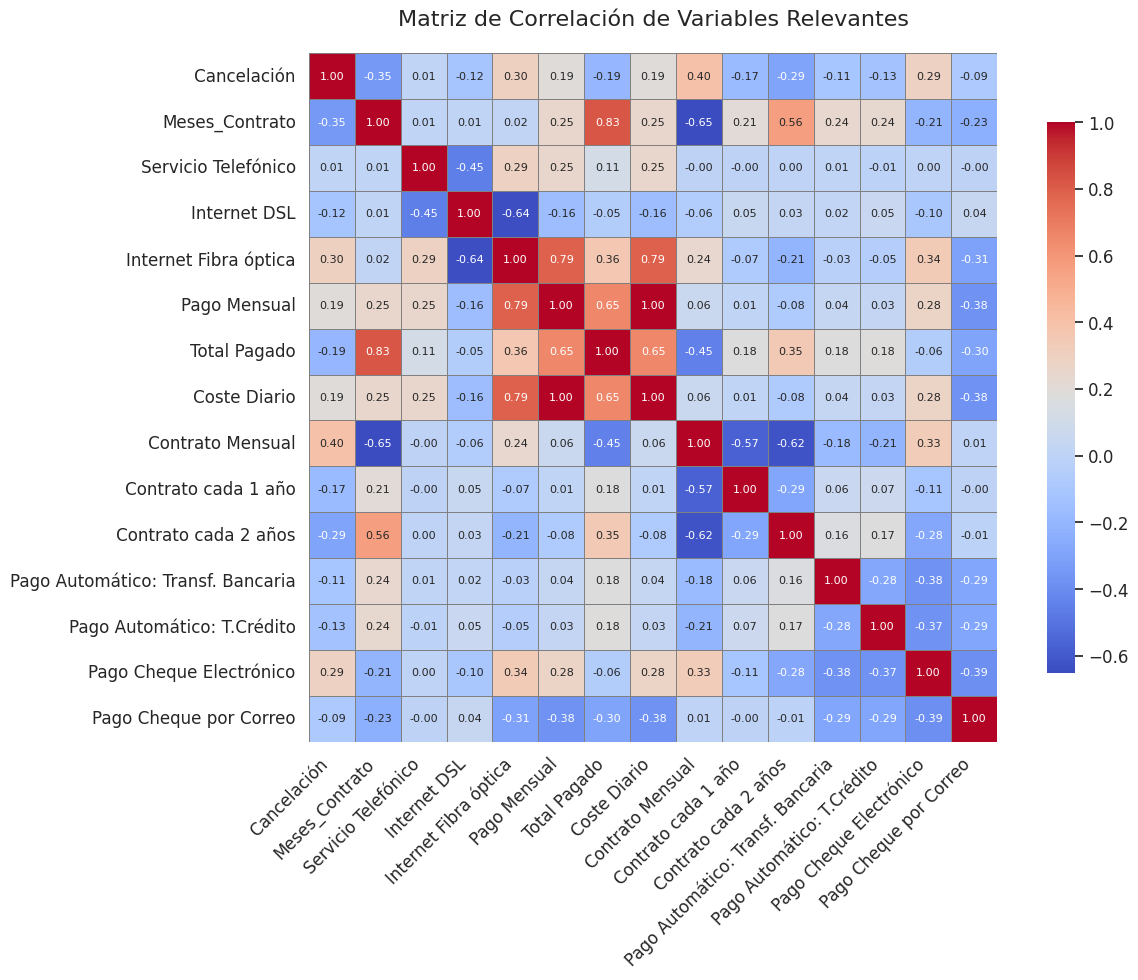

In [96]:
#Calcular matriz de correlaci√≥n
matriz_corr = datos[variables_corr].corr()

#Renombro las Columnas/filas
matriz_corr.rename(columns=nombres_correlacion, index=nombres_correlacion, inplace=True)

#Se Grafica
plt.figure(figsize=(13, 10))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Matriz de Correlaci√≥n de Variables Relevantes', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("correlaci√≥n_Cancelaci√≥n.png", dpi=300, bbox_inches='tight')

plt.show()

In [98]:
# Extraer Correlaci√≥n con 'Cancelaci√≥n'
correlaciones_cancelaci√≥n = matriz_corr.loc['Cancelaci√≥n'].drop('Cancelaci√≥n')

# Ordenar por valor absoluto (m√°s influyentes)
top_correlaciones = correlaciones_cancelaci√≥n.reindex(
    correlaciones_cancelaci√≥n.abs().sort_values(ascending=False).index
)

# Mostrar
print("Variables M√°s Correlacionadas con Cancelaci√≥n:\n")
print(top_correlaciones)


Variables M√°s Correlacionadas con Cancelaci√≥n:

Contrato Mensual                     0.395067
Meses_Contrato                      -0.345799
Internet Fibra √≥ptica                0.300416
Contrato cada 2 a√±os                -0.294467
Pago Cheque Electr√≥nico              0.294181
Total Pagado                        -0.194440
Coste Diario                         0.189393
Pago Mensual                         0.189393
Contrato cada 1 a√±o                 -0.174340
Pago Autom√°tico: T.Cr√©dito          -0.131448
Internet DSL                        -0.119945
Pago Autom√°tico: Transf. Bancaria   -0.114953
Pago Cheque por Correo              -0.089198
Servicio Telef√≥nico                  0.012337
Name: Cancelaci√≥n, dtype: float64


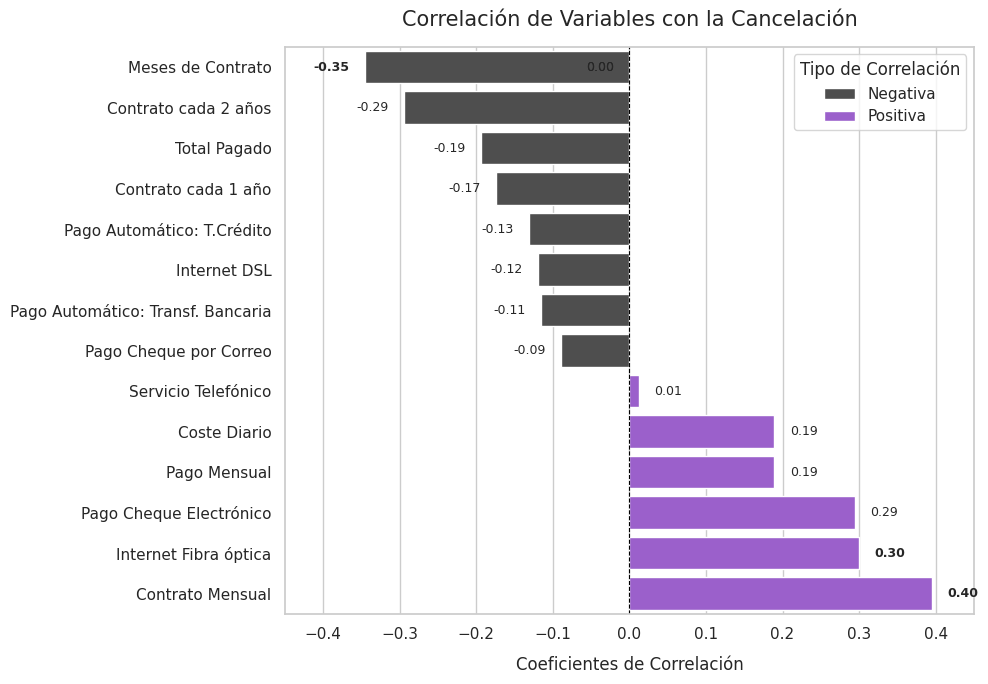

In [99]:
# Diccionario con los nombres para el gr√°fico
correlaciones = {
    'Contrato Mensual': 0.395067,
    'Meses de Contrato': -0.345799,
    'Internet Fibra √≥ptica': 0.300416,
    'Contrato cada 2 a√±os': -0.294467,
    'Pago Cheque Electr√≥nico': 0.294181,
    'Total Pagado': -0.194440,
    'Coste Diario': 0.189393,
    'Pago Mensual': 0.189393,
    'Contrato cada 1 a√±o': -0.174340,
    'Pago Autom√°tico: T.Cr√©dito': -0.131448,
    'Internet DSL': -0.119945,
    'Pago Autom√°tico: Transf. Bancaria': -0.114953,
    'Pago Cheque por Correo': -0.089198,
    'Servicio Telef√≥nico': 0.012337


}


# Crear DataFrame
df_corr = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Correlaci√≥n'])
df_corr = df_corr.sort_values(by='Correlaci√≥n').reset_index().rename(columns={'index': 'Variable'})
df_corr['Tipo'] = df_corr['Correlaci√≥n'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')

# Se Graf√≠ca
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
plot = sns.barplot(
    data=df_corr,
    x='Correlaci√≥n',
    y='Variable',
    hue='Tipo',
    dodge=False,
    palette={'Positiva': '#9D4EDD', 'Negativa': '#4E4E4E'}
)

# T√≠tulos y l√≠mites
plt.title('Correlaci√≥n de Variables con la Cancelaci√≥n', fontsize=15, pad=15)
plt.xlabel('Coeficientes de Correlaci√≥n', labelpad = 10)
plt.ylabel('')
plt.xlim(-0.45, 0.45)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de Correlaci√≥n')
plt.tight_layout()

# Agregar etiquetas con negrita para valores >= 0.30
for bar in plot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    variable = bar.get_y()  # posici√≥n
    value = width
    align = 'left' if width > 0 else 'right'
    offset = 0.02 if width > 0 else -0.02
    peso = 'bold' if abs(width) >= 0.30 else 'normal'
    plot.text(
        width + offset,
        y,
        f'{value:.2f}',
        va='center',
        ha=align,
        fontsize=9,
        fontweight=peso
    )

plt.savefig("top_correlacion_cancelaci√≥n.png", dpi=300, bbox_inches='tight')


plt.show()

Las variables con mayor correlaci√≥n positiva con la cancelaci√≥n (es decir, que aumentan cuando hay cancelaci√≥n) son el Contrato Mensual, el Internet de Fibra √ìptica y el Pago con Cheque Electr√≥nico.

Las variables con mayor correlaci√≥n negativa (es decir, que disminuyen cuando hay cancelaci√≥n) son los Meses de Contrato (antig√ºedad), el Contrato a 2 a√±os y el Pago Total acumulado.

En resumen, los clientes con contratos mensuales, fibra √≥ptica y que pagan con cheque electr√≥nico, as√≠ como los que tienen menos tiempo con la empresa y han pagado menos en total, tienden a ser m√°s propensos a cancelar.

#üìÑInforme final

#1. Introducci√≥n

Este cuaderno tiene como objetivo principal realizar un an√°lisis exhaustivo del fen√≥meno de la cancelaci√≥n de clientes (churn) en una empresa de telecomunicaciones. A trav√©s de un proceso de Extracci√≥n, Transformaci√≥n y Carga (ETL), se limpian, preparan y exploran los datos para identificar los factores clave asociados a la cancelaci√≥n.

El an√°lisis incluye la exploraci√≥n de la distribuci√≥n de la cancelaci√≥n, la comparaci√≥n de diferentes tipos de servicios, m√©todos de pago y contratos, as√≠ como la evaluaci√≥n de la relaci√≥n entre la cancelaci√≥n y el tiempo de permanencia y los gastos de los clientes. Finalmente, se presenta un an√°lisis de correlaci√≥n para identificar las variables m√°s influyentes en la decisi√≥n de cancelar y se resumen las conclusiones y recomendaciones derivadas del an√°lisis.

Este trabajo busca proporcionar insights valiosos para comprender por qu√© los clientes cancelan y sugerir estrategias para mejorar la retenci√≥n de clientes.

#2. Limpieza y Tratamiento de Datos

*- Se realiz√≥ la importaci√≥n del conjunto de datos original, seguido de un proceso exhaustivo de limpieza y transformaci√≥n:

*- Se eliminaron columnas redundantes como Servicio_internet (ya representada por DSL y Fibra_optica).

*- Se estandarizaron las variables categ√≥ricas y se convirtieron en variables binarias (dummies).

*- Se crearon nuevas variables calculadas como "Cuentas_diarias" a partir de los pagos mensuales.

*- Se ajustaron los nombres de variables para facilitar su interpretaci√≥n en las visualizaciones.

*- Se normalizaron los nombres de columnas para facilitar el an√°lisis.

#3. An√°lisis Exploratorio de Datos

*- Distribuci√≥n de Cancelaci√≥n
Se observa un porcentaje significativo de cancelaci√≥n, lo que justifica un an√°lisis profundo.

*- Comparaci√≥n de Medios de Pago
Ciertos m√©todos como el pago por cheque electr√≥nico est√°n m√°s asociados con cancelaciones.


*- Tipo de Contrato
El contrato mensual tiene una correlaci√≥n positiva con la cancelaci√≥n, mientras que los contratos anuales o bianuales se asocian a mayor permanencia.


*- Cuentas Totales y Tiempo de Permanencia
Los clientes que cancelan suelen gastar menos y llevar menos tiempo en la compa√±√≠a.


*- Tiempo de permanencia comparado con los gastos mensuales y diarios
Los clientes que abandonan el servicio suelen pagar m√°s al mes y llevar menos tiempo en la compa√±√≠a, esto sugiere que, aunque no cancelan inmediatamente, los usuarios con tarifas elevadas y poca fidelizaci√≥n terminan abandonando el servicio en menos de un a√±o.


*- Tipos de servicio
Se percibe que los clientes que cancelan suelen tener el servicio de Internet con Fibra √≥ptica


*- Matriz de Correlaci√≥n
El gr√°fico que muestra las variables tienen mayor relaci√≥n con la cancelaci√≥n.


*- Gr√°fico de Correlaciones Ordenadas
Presenta de forma clara las variables que m√°s se asocian positiva o negativamente con la cancelaci√≥n.


#4. Conclusiones e Insights

‚ùóLos clientes con contrato mensual, fibra √≥ptica y pagos m√°s frecuentes tienen una mayor probabilidad de cancelar el servicio.

‚ùóLos clientes con contrato anual o bianual, pagos autom√°ticos y mayor antig√ºedad tienden a permanecer m√°s tiempo.

‚ùóEl m√©todo de pago y el tipo de contrato son factores especialmente influyentes, por que los clientes que usan el pago con cheque electr√≥nico tienen mayor tasa de cancelaci√≥n.

‚ùóEl coste diario y el pago mensual est√°n positivamente correlacionados con la cancelaci√≥n, lo que sugiere que los clientes con tarifas m√°s altas o percepciones de coste elevado son m√°s propensos a abandonar el servicio.

‚ùó- El uso de internet por fibra √≥ptica muestra una mayor asociaci√≥n con la cancelaci√≥n, mientras que los clientes con servicio DSL tienden a permanecer m√°s tiempo. Este hallazgo puede deberse a factores como la percepci√≥n de calidad del servicio, tarifas u otras variables no observadas directamente.

#5. Recomendaciones

‚úÖ Fomentar la transici√≥n hacia contratos de mayor duraci√≥n mediante promociones o beneficios exclusivos.

‚úÖ Incentivar el uso de m√©todos de pago autom√°ticos, ya que se asocian a menor churn.

‚úÖ Monitorear activamente a los clientes con alto coste diario o mensual, ya que presentan mayor riesgo de cancelaci√≥n.

‚úÖ Implementar beneficios de permanencia o reducci√≥n gradual de tarifas como incentivo para prolongar la relaci√≥n contractual.

‚úÖ Redise√±ar los planes con fibra √≥ptica para ofrecer mayor valor o soporte, ya que esta tecnolog√≠a est√° asociada con mayor tasa de cancelaci√≥n.

‚úÖ Segmentar a los clientes con m√°s riesgo de fuga para aplicar estrategias de retenci√≥n personalizadas.

‚úÖ Implementar alertas tempranas cuando un cliente cumple patrones de alto riesgo de churn.

